# AdultMouseBrain (Visium) In Silico Knockout Tutorial

<p style="color:#1E90FF;">
<b>Note:</b> To run this notebook, please first complete and execute the <i>AdultMouseBrain (Visium) Analysis Tutorial</i> notebook and save the resulting output files as instructed.
</p>


In [1]:
from models.downstreamGenes import *
import numpy as np
import squidpy as sq
import scanpy as sc
import pickle
from models.help_func import build_cell_lr_tensor,set_seed
import matplotlib.pyplot as plt

set_seed(42)

/home/jtyu@ZHANGroup.local/miniconda3/envs/scild/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/jtyu@ZHANGroup.local/miniconda3/envs/scild/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


## Import data and SCILD results

In [2]:
adata = sc.read_h5ad('./data/AdultMouseBrainVisium_adata_processed.h5ad')
adata

AnnData object with n_obs × n_vars = 704 × 16562
    obs: 'in_tissue', 'array_row', 'array_col', 'cluster', 'cluster_short'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [3]:
with open("./results/AdultMouseBrainVisium_SCILD_result.pkl", "rb") as f:
    SCILD_res = pickle.load(f)

In [4]:
SCILD_tensor, ligands, receptors = build_cell_lr_tensor(SCILD_res, adata.shape[0])
ligand_to_index = {lig: idx for idx, lig in enumerate(ligands)}
receptor_to_index = {rec: idx for idx, rec in enumerate(receptors)}

In [5]:
SCILD_tensor.shape

(704, 122, 137)

## Train the NN model

Training Epochs:  23%|██▎       | 114/500 [00:44<02:32,  2.54it/s, Epoch=115, Train Loss=0.0956, Val Loss=0.0972, LR=0.000031]

Early stopping at epoch 116


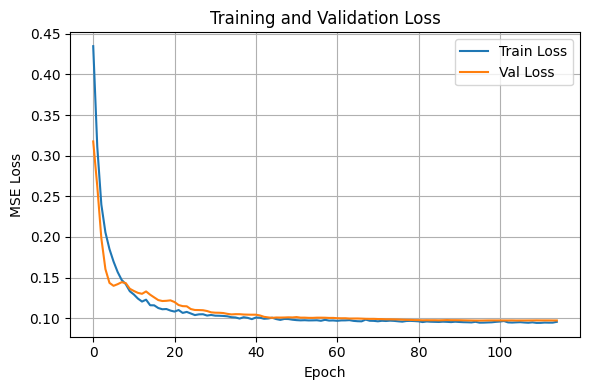

In [6]:
model = train_model(
    SCILD_tensor,
    Y=adata.X.A,
    epochs=500,
    batch_size=64,
    lr=1e-3,
    val_split=0.2,
    patience=20
)

## In silico knockout of Psap->Gpr37


Top 10 affected genes (by magnitude) after ablating L=81, R=55:
1. Mobp — Δexpr = -0.2119 ↓
2. Plp1 — Δexpr = -0.1989 ↓
3. Cldn11 — Δexpr = -0.1740 ↓
4. Mbp — Δexpr = -0.1651 ↓
5. Mal — Δexpr = -0.1617 ↓
6. Trf — Δexpr = -0.1613 ↓
7. Cnp — Δexpr = -0.1607 ↓
8. Ptgds — Δexpr = -0.1506 ↓
9. Gpr37 — Δexpr = -0.1475 ↓
10. Plekhb1 — Δexpr = -0.1435 ↓

Top 5 Upregulated Genes:
1. Nrgn — Δexpr = +0.0653 ↑
2. Basp1 — Δexpr = +0.0652 ↑
3. Chn1 — Δexpr = +0.0610 ↑
4. Gria1 — Δexpr = +0.0585 ↑
5. Gria2 — Δexpr = +0.0580 ↑

Top 5 Downregulated Genes:
1. Mobp — Δexpr = -0.2119 ↓
2. Plp1 — Δexpr = -0.1989 ↓
3. Cldn11 — Δexpr = -0.1740 ↓
4. Mbp — Δexpr = -0.1651 ↓
5. Mal — Δexpr = -0.1617 ↓


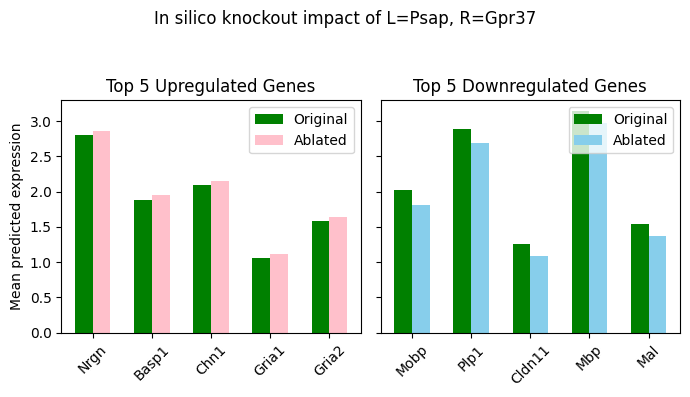

In [8]:
ligand_ = 'Psap'
receptor_ = 'Gpr37'
TG_name = list(adata.var.index)
ablation_results = ablation_analysis(
    model, 
    SCILD_tensor, 
    l_idx=ligand_to_index[ligand_], 
    r_idx=receptor_to_index[receptor_], 
    gene_names=TG_name,
    title_=f"In silico knockout impact of L={ligand_}, R={receptor_}",
    save_file='./results/AdultMouseBrainVisium_InSilicoKnockout_PsapGpr37_result.svg')

Please specify a valid `library_id` or set it permanently in `adata.uns['spatial']`


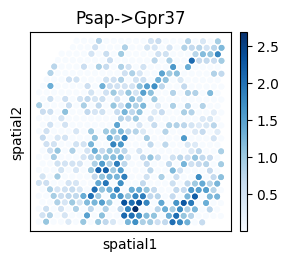

In [9]:
adata.obs[ligand_ + '->' + receptor_] = SCILD_tensor[:, ligand_to_index[ligand_], receptor_to_index[receptor_]]
sq.pl.spatial_scatter(adata, color=ligand_ + '->' + receptor_, cmap='Blues', shape=None, size=40, figsize=(10, 2.5))

Please specify a valid `library_id` or set it permanently in `adata.uns['spatial']`


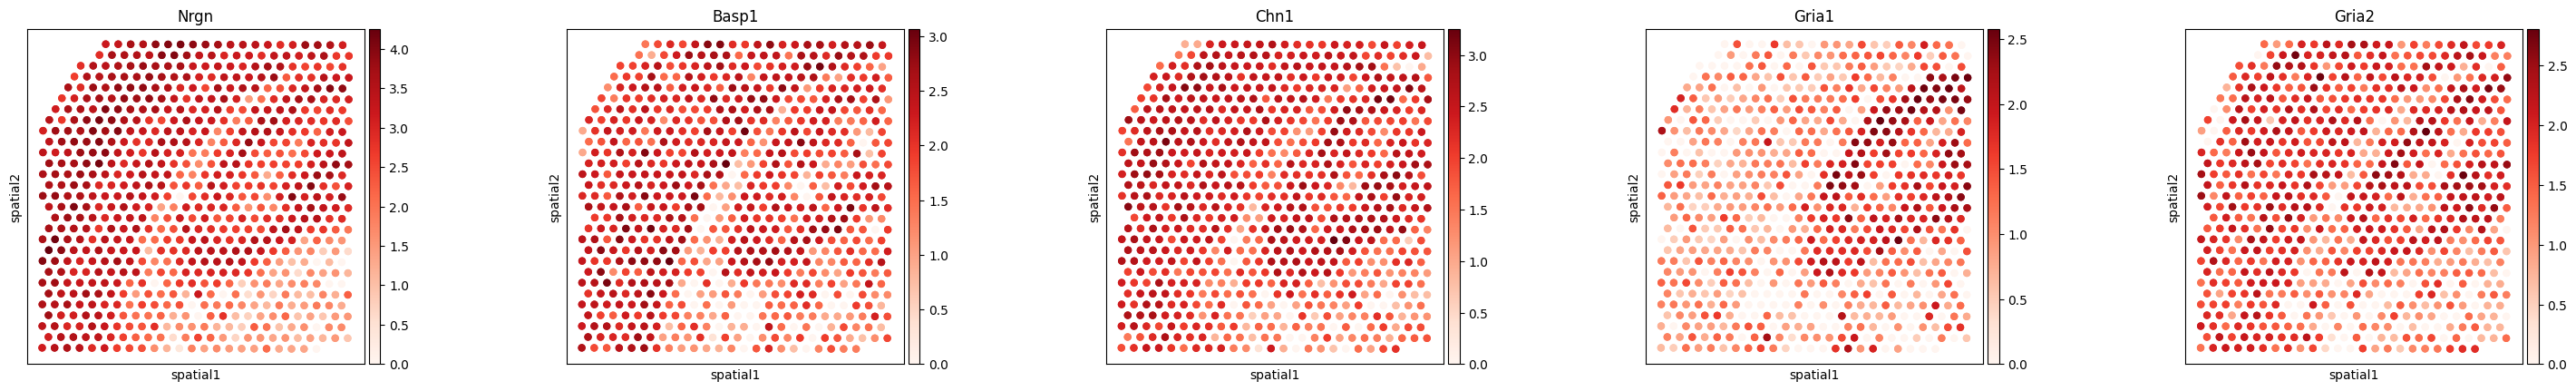

In [10]:
sq.pl.spatial_scatter(adata, color=[TG_name[i] for i in ablation_results['top_up_idx']], 
                      cmap='Reds', shape=None, size=100, ncols=5)

Please specify a valid `library_id` or set it permanently in `adata.uns['spatial']`


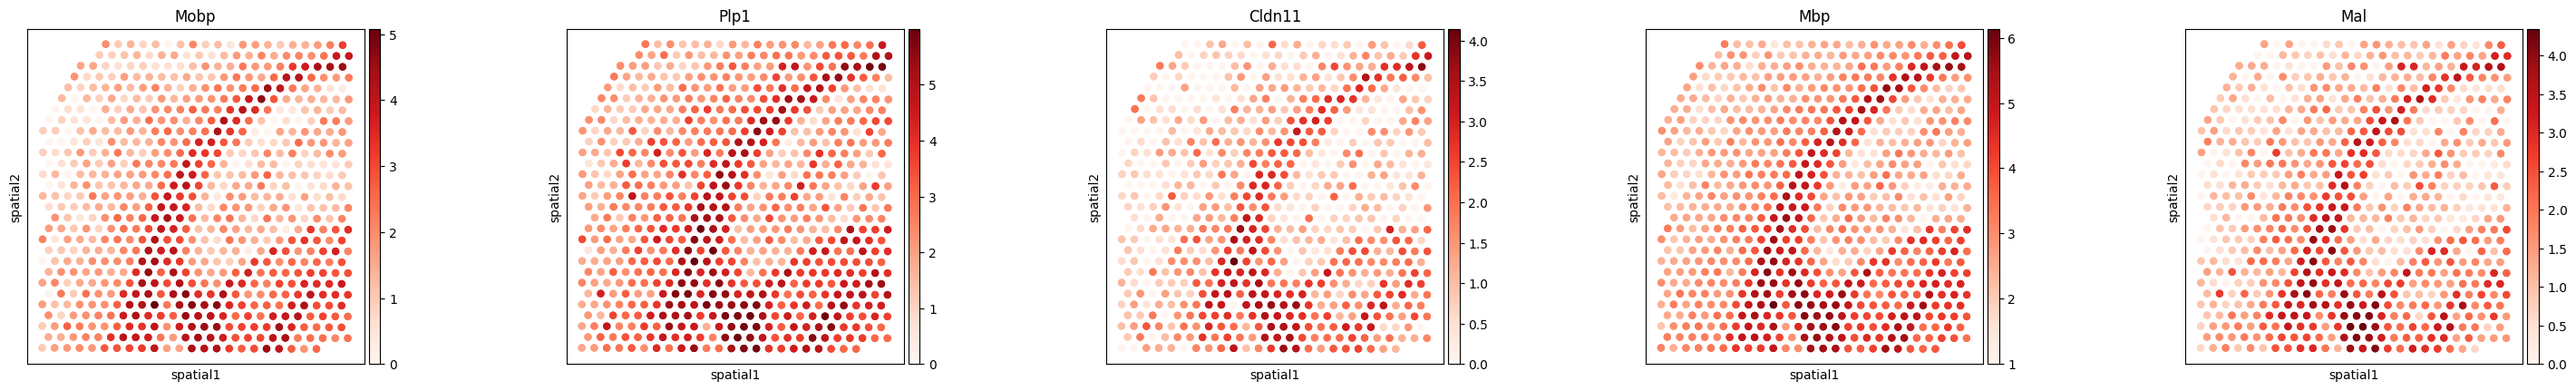

In [11]:
sq.pl.spatial_scatter(adata, color=[TG_name[i] for i in ablation_results['top_down_idx']], 
                      cmap='Reds', shape=None, size=100, ncols=5)

## In silico knockout of Cck->Cckbr


Top 10 affected genes (by magnitude) after ablating L=15, R=17:
1. Plp1 — Δexpr = +0.0223 ↑
2. Mbp — Δexpr = +0.0195 ↑
3. Mobp — Δexpr = +0.0191 ↑
4. Cldn11 — Δexpr = +0.0160 ↑
5. Mef2c — Δexpr = -0.0142 ↓
6. Ptgds — Δexpr = +0.0138 ↑
7. Mal — Δexpr = +0.0133 ↑
8. Dbi — Δexpr = +0.0132 ↑
9. Scd2 — Δexpr = +0.0131 ↑
10. Mt1 — Δexpr = +0.0122 ↑

Top 5 Upregulated Genes:
1. Plp1 — Δexpr = +0.0223 ↑
2. Mbp — Δexpr = +0.0195 ↑
3. Mobp — Δexpr = +0.0191 ↑
4. Cldn11 — Δexpr = +0.0160 ↑
5. Ptgds — Δexpr = +0.0138 ↑

Top 5 Downregulated Genes:
1. Mef2c — Δexpr = -0.0142 ↓
2. Arpp21 — Δexpr = -0.0115 ↓
3. Ngef — Δexpr = -0.0111 ↓
4. Stx1a — Δexpr = -0.0107 ↓
5. Nrgn — Δexpr = -0.0106 ↓


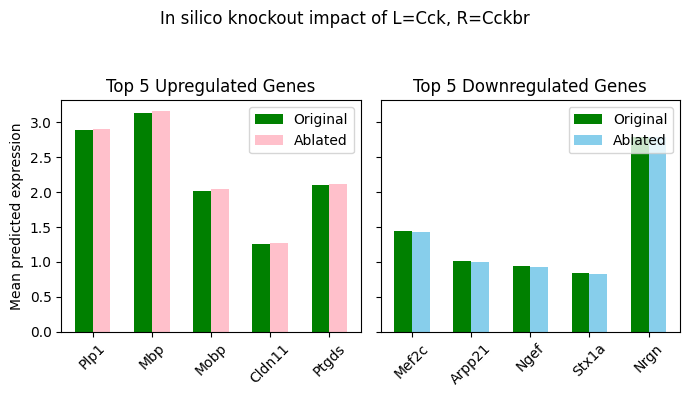

In [12]:
ligand_ = 'Cck'
receptor_ = 'Cckbr'
TG_name = list(adata.var.index)
ablation_results = ablation_analysis(
    model, 
    SCILD_tensor, 
    l_idx=ligand_to_index[ligand_], 
    r_idx=receptor_to_index[receptor_], 
    gene_names=TG_name,
    title_=f"In silico knockout impact of L={ligand_}, R={receptor_}",
    save_file='./results/AdultMouseBrainVisium_InSilicoKnockout_CckCckbr_result.svg')

Please specify a valid `library_id` or set it permanently in `adata.uns['spatial']`


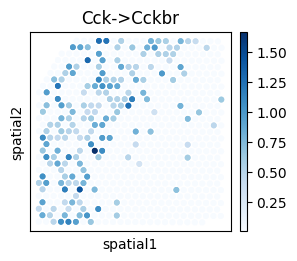

In [13]:
adata.obs[ligand_ + '->' + receptor_] = SCILD_tensor[:, ligand_to_index[ligand_], receptor_to_index[receptor_]]
sq.pl.spatial_scatter(adata, color=ligand_ + '->' + receptor_, cmap='Blues', shape=None, size=40, figsize=(10, 2.5))

Please specify a valid `library_id` or set it permanently in `adata.uns['spatial']`


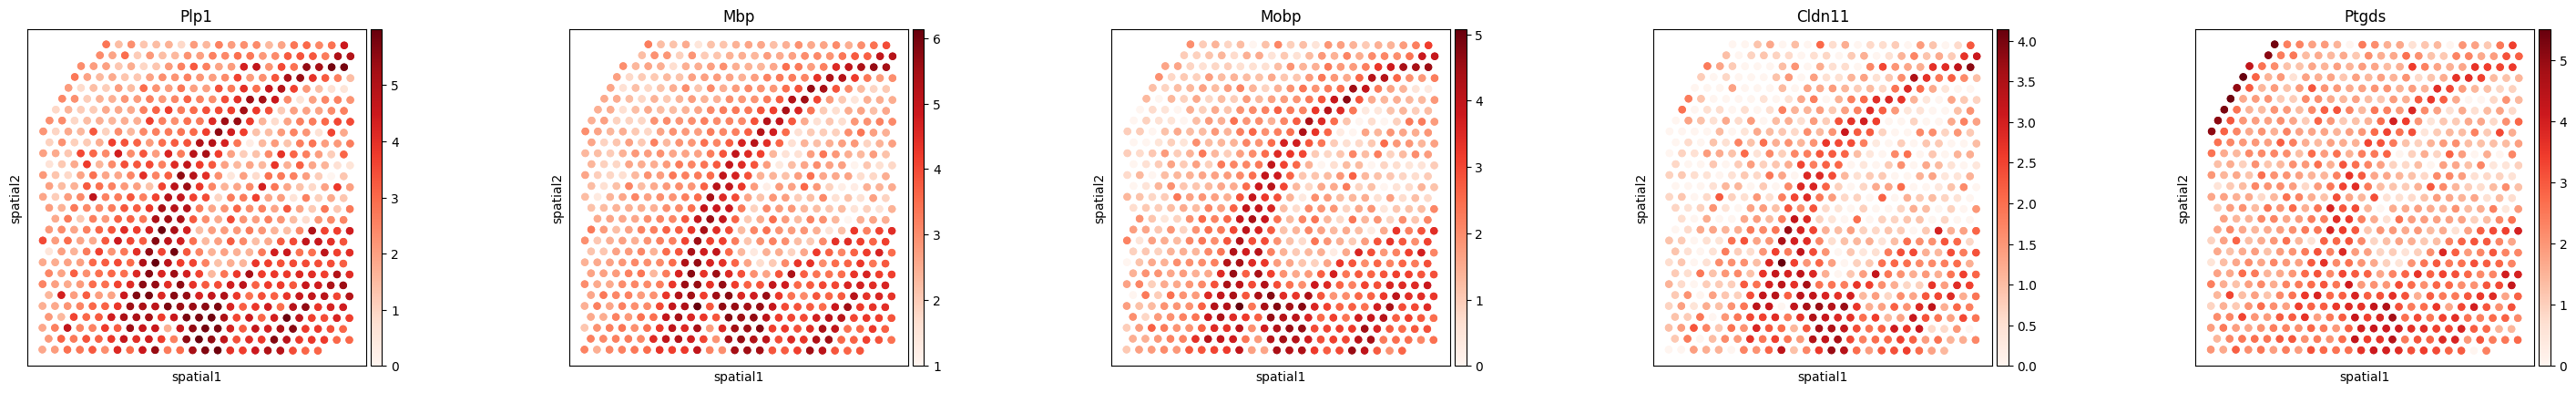

In [15]:
sq.pl.spatial_scatter(adata, color=[TG_name[i] for i in ablation_results['top_up_idx']], 
                      cmap='Reds', shape=None, size=100, ncols=5)

Please specify a valid `library_id` or set it permanently in `adata.uns['spatial']`


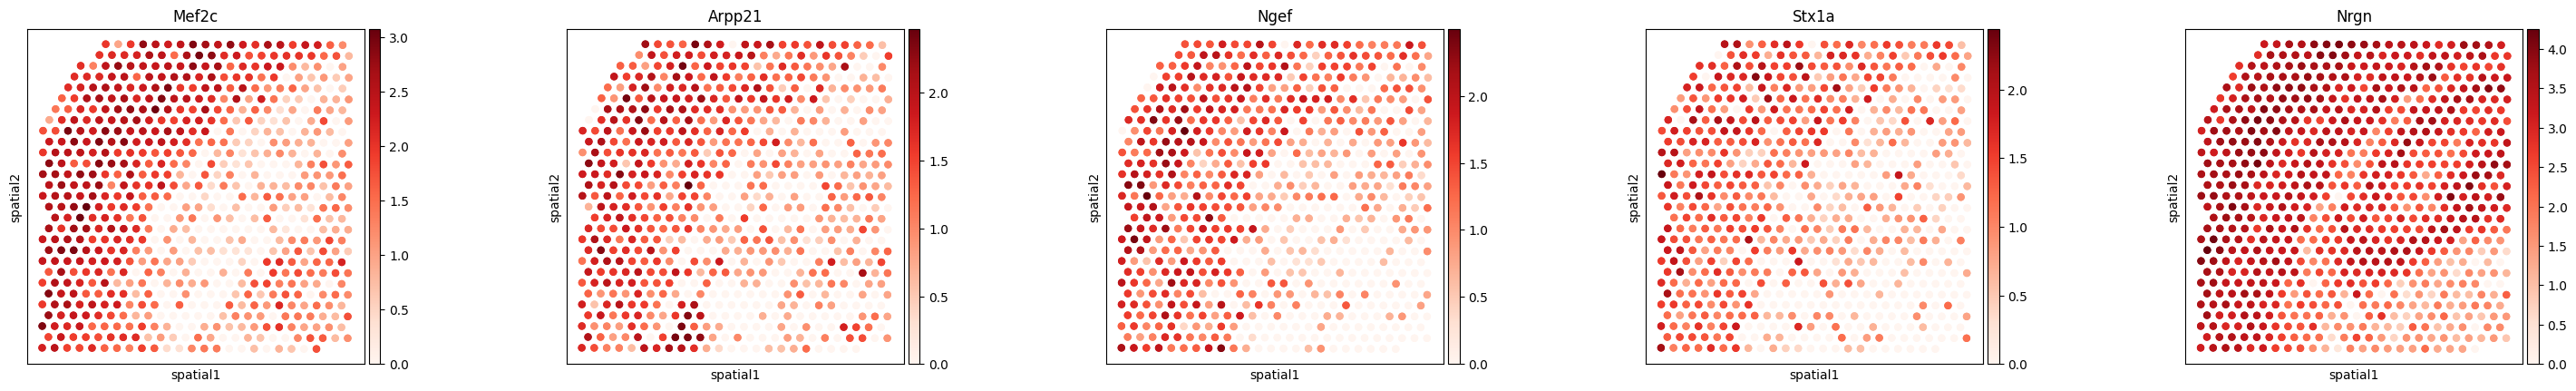

In [16]:
sq.pl.spatial_scatter(adata, color=[TG_name[i] for i in ablation_results['top_down_idx']], 
                      cmap='Reds', shape=None, size=100, ncols=5)